# PARCIAL 1 PRACTICA 

Universidad Tecnologica de Pereira 2019 - HPC 
<br>
Laura Sophia González Montoya

## Especificaciones de maquina
Encontradas en los archivos pc_info.txt y gpu_info.txt dentro del repositorio

## Shell Script 
prueba.hpc y prueba2.hpc son shell scripts que realizan de forma automatica la compilacion, ejecucion y recoleccion de datos, el primer archivo es para el proceso de secuencial  y el segundo para el proceso de paralelo.<br>tiling.hpc es el script que realiza las mismas tareas que los dos anteriores pero sobre las matrices en las que se aplico la tecnica de tiling

## Archivos .txt

Trabajaremos sobre matrices de dimensiones 100,250,500,750 y 1000, donde los tiempos de ejecucion seran guardados de la siguiente manera

datos_secuencial.txt = secuencial
<br>
datos_paralelo.txt = paralelo sin tiling
<br>
datos_tiling.txt = paralelo con tiling
<br>
datos_tiling_block.txt = paralelo con tiling en diferentes tamaños de bloque


## TIEMPOS DE EJECUCION SECUENCIAL

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import load_dataset

In [3]:
datos = pd.read_csv("datos_sec.txt")
datos.head()

,TAM_S,TIME_S
0,100,0.011374
1,250,0.162874
2,500,1.588370
3,750,6.227720
4,1000,20.103900


In [4]:
datSeq = datos.groupby(["TAM_S"]).mean()
datSeq.reset_index(level=0,inplace=True)
datSeq

,TAM_S,TIME_S
0,100,0.011955
1,250,0.165485
2,500,1.590111
3,750,6.461071
4,1000,20.438326


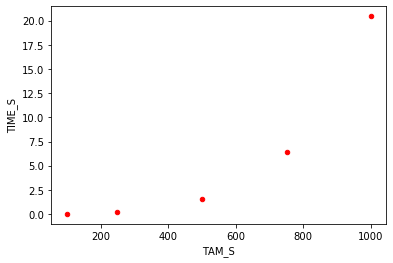

In [5]:
datSeq.plot(kind='scatter',x='TAM_S',y='TIME_S',color='red')
plt.show()

## TIEMPOS DE EJECUCION PARALELO SIN TILING

In [6]:
datos_p = pd.read_csv("datos_paralelo.txt")
datos_p.head()

,TAM_P,TIME_P
0,100,0.009151
1,250,0.090948
2,500,1.016210
3,750,4.629140
4,1000,16.301400


In [7]:
datParl = datos_p.groupby(["TAM_P"]).mean()
datParl.reset_index(level=0,inplace=True)
datParl

,TAM_P,TIME_P
0,100,0.006601
1,250,0.102164
2,500,1.247381
3,750,5.062511
4,1000,15.967606


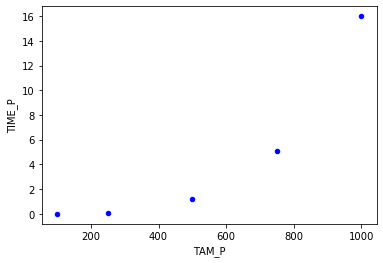

In [8]:
datParl.plot(kind='scatter',x='TAM_P',y='TIME_P',color='blue')
plt.show()

## TIEMPOS DE EJECUCION TILING

### Verificacion de funcionamiento 

<img src="tiled_verificacion.png">

In [11]:
datos = pd.read_csv("datos_tiling.txt")
datos.head()

,TAM_T,TIME_T
0,100,0.007861
1,250,0.125991
2,500,2.532240
3,750,10.320600
4,1000,32.737100


In [13]:
datTil = datos.groupby(["TAM_T"]).mean()
datTil.reset_index(level=0,inplace=True)
datTil

,TAM_T,TIME_T
0,100,0.005454
1,250,0.165673
2,500,2.429215
3,750,11.619048
4,1000,37.159419


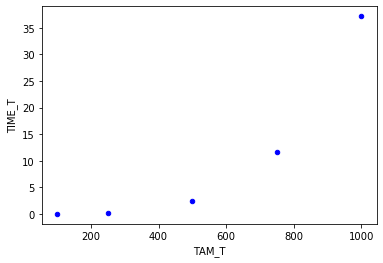

In [15]:
datTil.plot(kind='scatter',x='TAM_T',y='TIME_T',color='blue')
plt.show()

# SPEEDUP SECUENCIAL Y TILING

### $$Speedup = \frac{tiling}{secuencial}$$

In [16]:
datosMerge = pd.merge(left = datSeq, left_index = False, left_on='TAM_S', 
                       right=datTil, right_index=False,right_on = 'TAM_T')
datosMerge

,TAM_S,TIME_S,TAM_T,TIME_T
0,100,0.011955,100,0.005454
1,250,0.165485,250,0.165673
2,500,1.590111,500,2.429215
3,750,6.461071,750,11.619048
4,1000,20.438326,1000,37.159419


In [37]:
datosMerge['SPEEDUP'] = datosMerge["TIME_T"]/ datosMerge["TIME_S"]
datosMerge

,TAM_S,TIME_S,TAM_T,TIME_T,SPEEDUP
0,100,0.011955,100,0.005454,0.456227
1,250,0.165485,250,0.165673,1.001133
2,500,1.590111,500,2.429215,1.527701
3,750,6.461071,750,11.619048,1.798316
4,1000,20.438326,1000,37.159419,1.818124


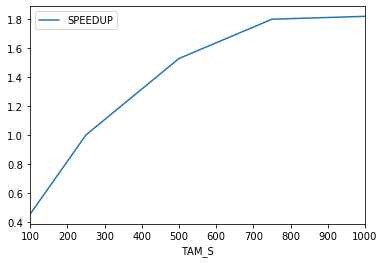

In [38]:
ax = plt.gca()
datosMerge.plot(kind='line',x='TAM_S',y='SPEEDUP', ax=ax)
plt.show()

# SPEEDUP PARALELO Y TILING

### $$Speedup = \frac{tiling}{paralelo}$$

In [19]:
datosMerge2 = pd.merge(left = datParl, left_index = False, left_on='TAM_P', 
                       right=datTil, right_index=False,right_on = 'TAM_T')
datosMerge2

,TAM_P,TIME_P,TAM_T,TIME_T
0,100,0.006601,100,0.005454
1,250,0.102164,250,0.165673
2,500,1.247381,500,2.429215
3,750,5.062511,750,11.619048
4,1000,15.967606,1000,37.159419


In [39]:
datosMerge2['SPEEDUP'] = datosMerge2["TIME_T"]/ datosMerge2["TIME_P"]
datosMerge2

,TAM_P,TIME_P,TAM_T,TIME_T,SPEEDUP
0,100,0.006601,100,0.005454,0.826274
1,250,0.102164,250,0.165673,1.621640
2,500,1.247381,500,2.429215,1.947452
3,750,5.062511,750,11.619048,2.295116
4,1000,15.967606,1000,37.159419,2.327175


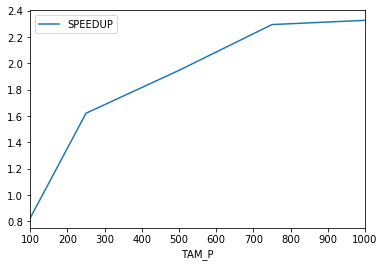

In [40]:
ax = plt.gca()
datosMerge2.plot(kind='line',x='TAM_P',y='SPEEDUP', ax=ax)
plt.show()

# TIEMPOS PARA DIFERENTES TAMAÑOS DE BLOQUES

Se manejara el mismo tamaño de matriz que será de 500x500 para la prueba con tiling de diferentes tamaños de bloques los cuales sera 4x4 16x16 y 32x32 

In [28]:
datos = pd.read_csv("datos_tiling_block.txt")
datos.head(3)

,TAM_B,TIME_B
0,4,7.87243
1,16,1.98289
2,32,1.02299


In [29]:
datBloq = datos.groupby(["TAM_B"]).mean()
datBloq.reset_index(level=0,inplace=True)
datBloq

,TAM_B,TIME_B
0,4,7.314705
1,16,1.908621
2,32,1.052858


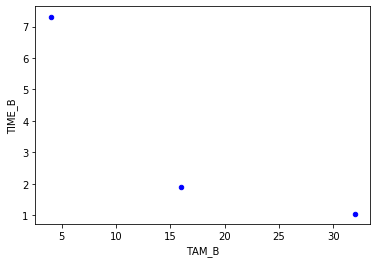

In [30]:
datBloq.plot(kind='scatter',x='TAM_B',y='TIME_B',color='blue')
plt.show()

# TIEMPOS PARALELO CON TILING EN PUNTO FLOTANTE

Verificacion de funcionamiento

<img src="float.png">

In [31]:
datos = pd.read_csv("datos_tiling_float.txt")
datos.head()

,TAM_FL,TIME_FL
0,100,0.008498
1,250,0.066450
2,500,0.634401
3,750,2.682360
4,1000,8.432270


In [32]:
datFloat = datos.groupby(["TAM_FL"]).mean()
datFloat.reset_index(level=0,inplace=True)
datFloat

,TAM_FL,TIME_FL
0,100,0.005859
1,250,0.074108
2,500,0.688207
3,750,2.885466
4,1000,8.289867


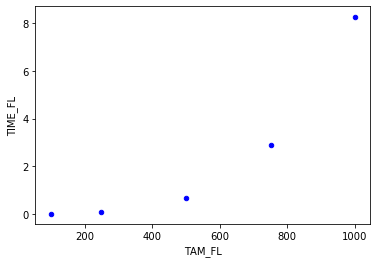

In [33]:
datFloat.plot(kind='scatter',x='TAM_FL',y='TIME_FL',color='blue')
plt.show()

# SPEEDUP TILING INT VS FLOAT

In [34]:
datosMerge3 = pd.merge(left = datTil, left_index = False, left_on='TAM_T', 
                       right=datFloat, right_index=False,right_on = 'TAM_FL')
datosMerge3

,TAM_T,TIME_T,TAM_FL,TIME_FL
0,100,0.005454,100,0.005859
1,250,0.165673,250,0.074108
2,500,2.429215,500,0.688207
3,750,11.619048,750,2.885466
4,1000,37.159419,1000,8.289867


In [35]:
datosMerge3['SPEEDUP'] = datosMerge3["TIME_T"]/ datosMerge3["TIME_FL"]
datosMerge3

,TAM_T,TIME_T,TAM_FL,TIME_FL,SPEEDUP
0,100,0.005454,100,0.005859,0.930891
1,250,0.165673,250,0.074108,2.235548
2,500,2.429215,500,0.688207,3.529772
3,750,11.619048,750,2.885466,4.026749
4,1000,37.159419,1000,8.289867,4.482511


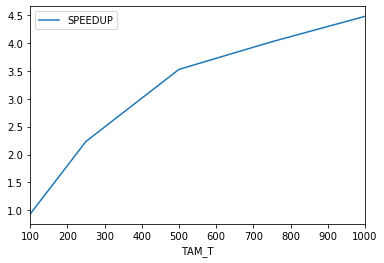

In [36]:
ax = plt.gca()
datosMerge3.plot(kind='line',x='TAM_T',y='SPEEDUP', ax=ax)
plt.show()

# CONCLUSIONES

En los primeros speedups se pude observar que el secuencial alcanza una aceleracion de 1.8x sobre el tiling
y el paralelo un 2.4x, siendo el tiling el mas lento entre estos. 
Se cree que la causa de esto es la complejidad computacional que maneja ese algoritmo por tener mas loops que el secuencial y el paralelo. <br> <br>
Ademas en la prueba con bloques de diferentes tamaños la mejora del tiempo con respecto a mayor tamaño de bloque. Donde se cree que juega un papel importante la cacheline. <br> <br>
Por ultimo en las pruebas con matrices de punto flotante se obtuvo una mejora significativa con respecto a las pruebas con numeros enteros. Investigando un poco, al parecer 'int' posee varias bases (*, 0 *, 0x *, 0b *, 0o *) lo cual hace sumar tiempo en determinar a que base pertenece el entero